<H1>Stratégie Bollinger Trend Multicoin</H1>
Indicateurs: bande de Bollinger + moyenne mobile long terme<br>
SEG

In [1]:
import sys
sys.path.append('../..')
from utilities.get_data import get_historical_from_db
from utilities.backtesting import basic_single_asset_backtest, plot_wallet_vs_asset_multi, get_metrics, get_n_columns, plot_sharpe_evolution, plot_bar_by_month, complete_multi_asset_backtest
from backtest.multi_division.class_bol.boltrendmulti import BollingerTrendMulti
from utilities.data_manager import ExchangeDataManager
import ccxt
import matplotlib.pyplot as plt

In [2]:
params_coin = {
    "BTC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ETH/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "BNB/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "LTC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ADA/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "XRP/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "EOS/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "TRX/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ETC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "VET/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "LINK/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "MATIC/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "ATOM/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "DOGE/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "CHZ/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "BCH/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "MKR/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "SAND/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "SOL/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "DOT/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "EGLD/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "AVAX/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "FIL/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "AAVE/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "AXS/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "GRT/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "CAKE/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "SHIB/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
    "APE/USDT": {
        "wallet_exposure": 0.1,
        "bb_window": 100,
        "bb_std": 2.25,
        "long_ma_window": 500
    },
}

pair_list = list(params_coin.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT"
maker_fee, taker_fee = 0.00017, 0.00051   #Bitget
# maker_fee, taker_fee = 0.0003, 0.00012   #Binance

exchange = ExchangeDataManager(
    exchange_name=exchange_name, 
    path_download="../database/exchanges"
)

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc[:]

print("Data load 100%")
# df_list[oldest_pair]

Data load 100%


In [3]:
strat = BollingerTrendMulti(
    df_list=df_list,
    oldest_pair=oldest_pair,
    parameters_obj=params_coin,
    type=["long","short"]
)

strat.populate_indicators()
strat.populate_buy_sell()
bt_result = strat.run_backtest(initial_wallet=1000, leverage=1, max_var=1.5, maker_fee=maker_fee, taker_fee=taker_fee)

df_trades, df_days = complete_multi_asset_backtest(
    trades=bt_result['trades'], 
    days=bt_result['days'],
    general_info=True,
    trades_info=True,
    days_info=True,
    long_short_info=True,
    entry_exit_info=True,
    exposition_info=True,
    pair_info=True,
    indepedant_trade=True
)

╒═════════════════════════════════╤══════════════════════════╕
│ Informations générales          │                          │
╞═════════════════════════════════╪══════════════════════════╡
│ Période                         │ 28.09.2017 -> 04.03.2023 │
│ Portefeuille initial            │ 1,000.00 $               │
│                                 │                          │
│ Portefeuille final              │ 0.00 $                   │
│ Performance vs US dollar        │ -100.00 %                │
│ Pire Drawdown T|D               │ -100.0 % | -100.0 %      │
│ Moyenne journalière Drawdown    │ -92.49 %                 │
│ Buy and hold performance        │ 438.74 %                 │
│ Performance vs buy and hold     │ -100.00 %                │
│ Nombre total de trades          │ 3589                     │
│ Sharpe | Sortino | Calmar Ratio │ -10.75 | -12.34 | -11.06 │
│ Global Win rate                 │ 12.26 %                  │
│ Profit moyen                    │ -8.95 %            

<H1>Stratégie Bollinger Trend</H1>
Indicateurs: bande de Bollinger + moyenne mobile long terme<br>
SEG

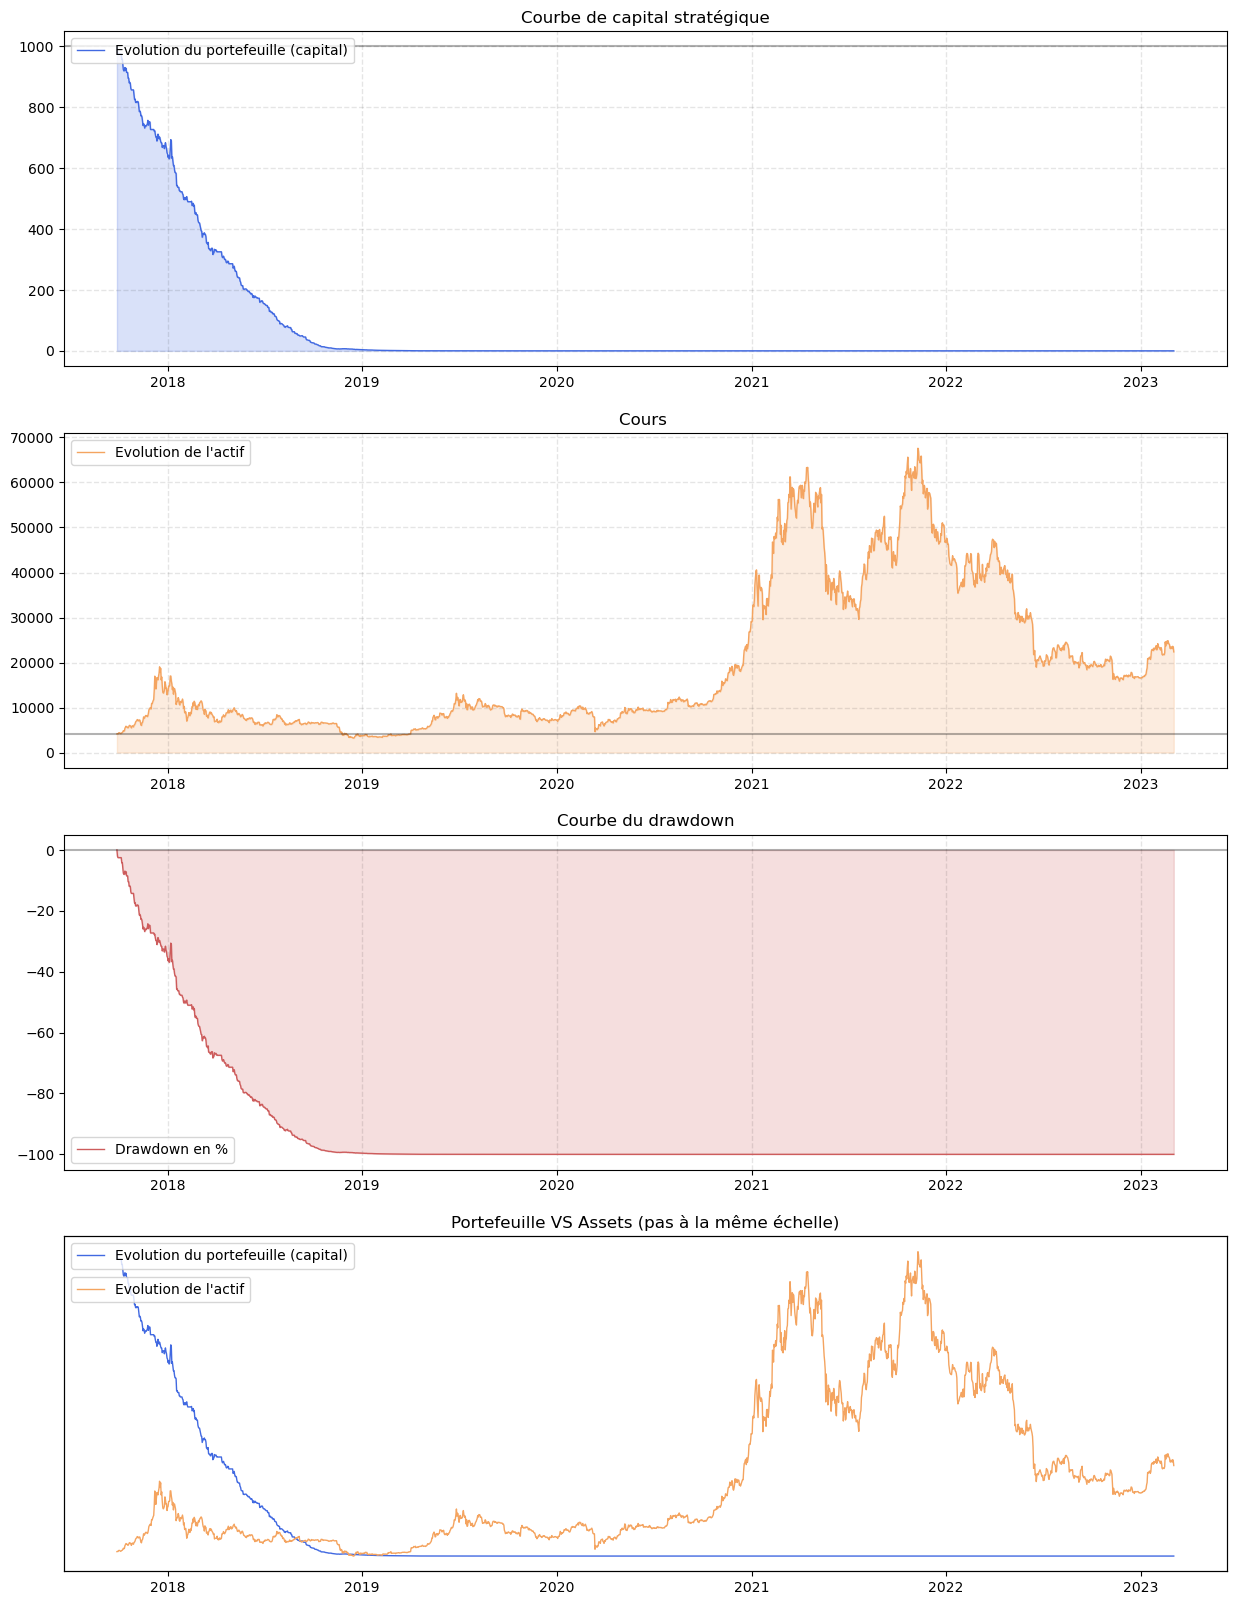

In [4]:
plot_wallet_vs_asset_multi(df_days=df_days.loc[:])

----- 2017 Performances cumulées: -34.92% --


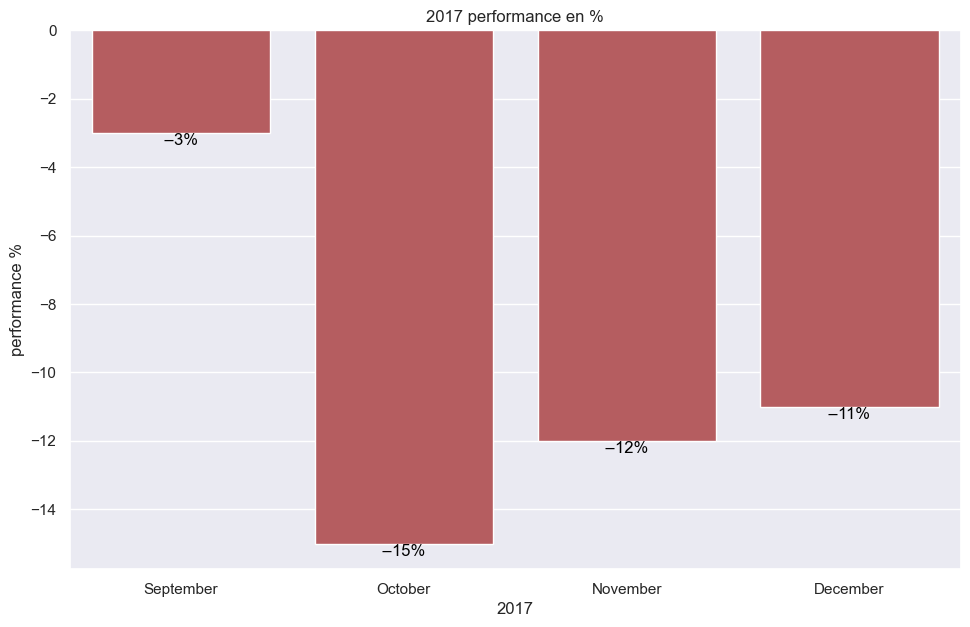

----- 2018 Performances cumulées: -99.37% --


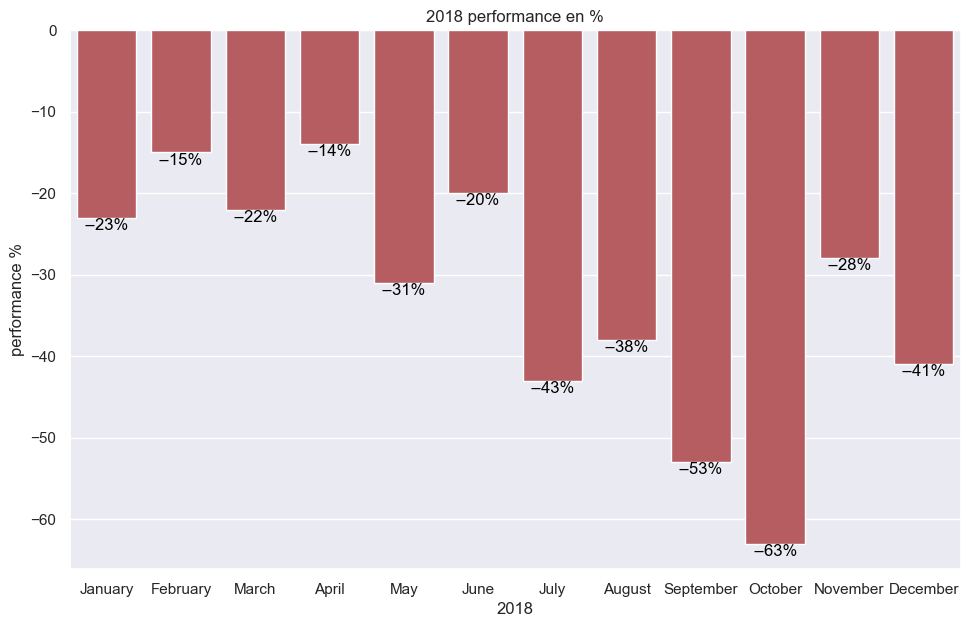

----- 2019 Performances cumulées: -100.0% --


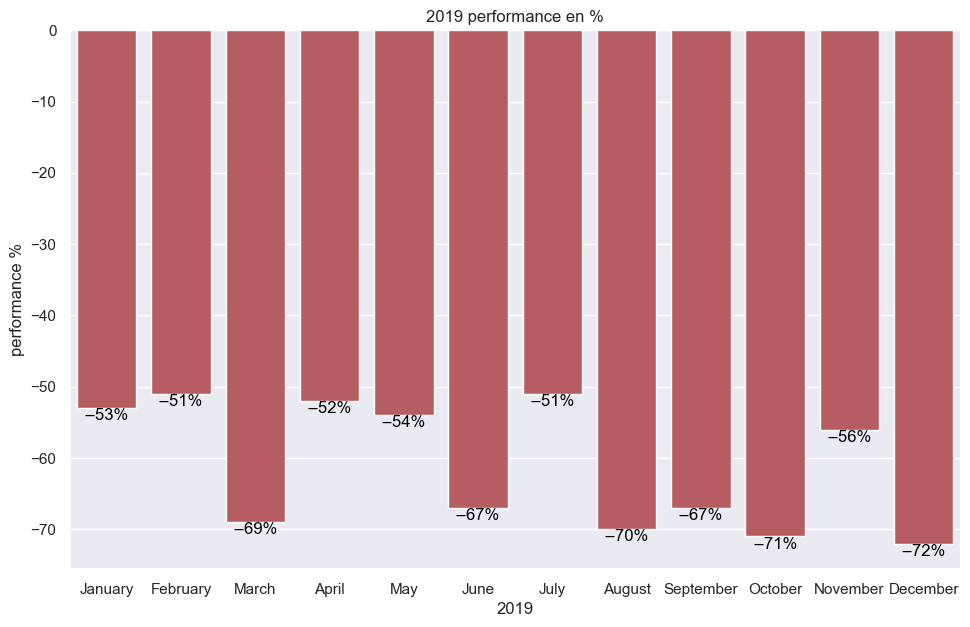

----- 2020 Performances cumulées: -100.0% --


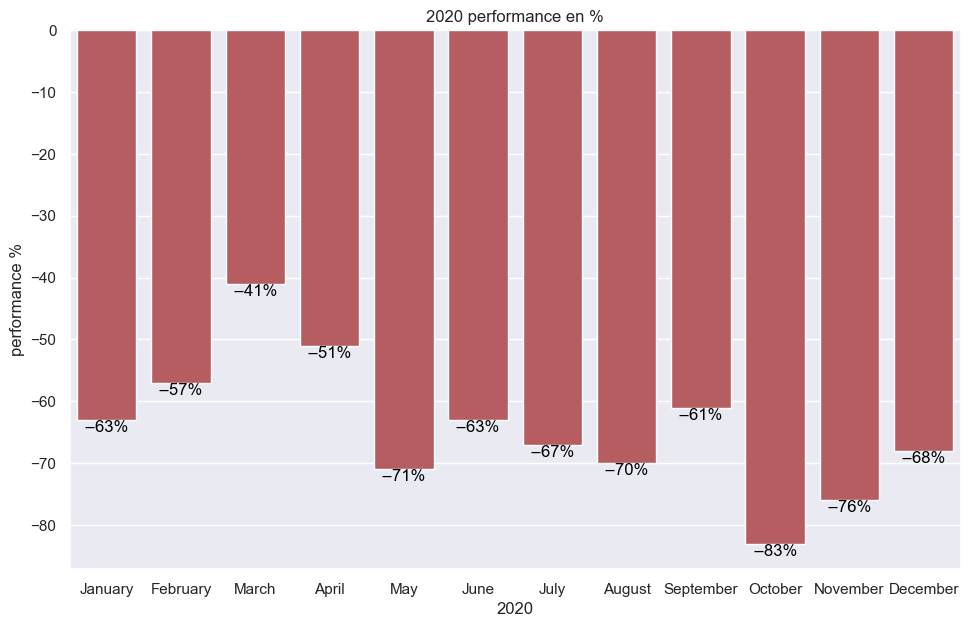

----- 2021 Performances cumulées: -100.0% --


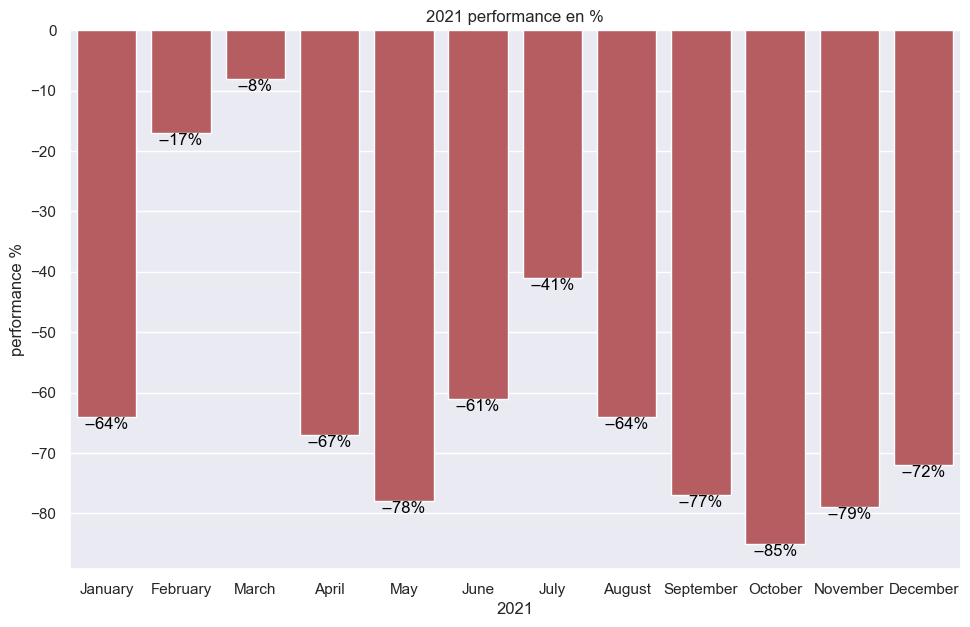

----- 2022 Performances cumulées: -100.0% --


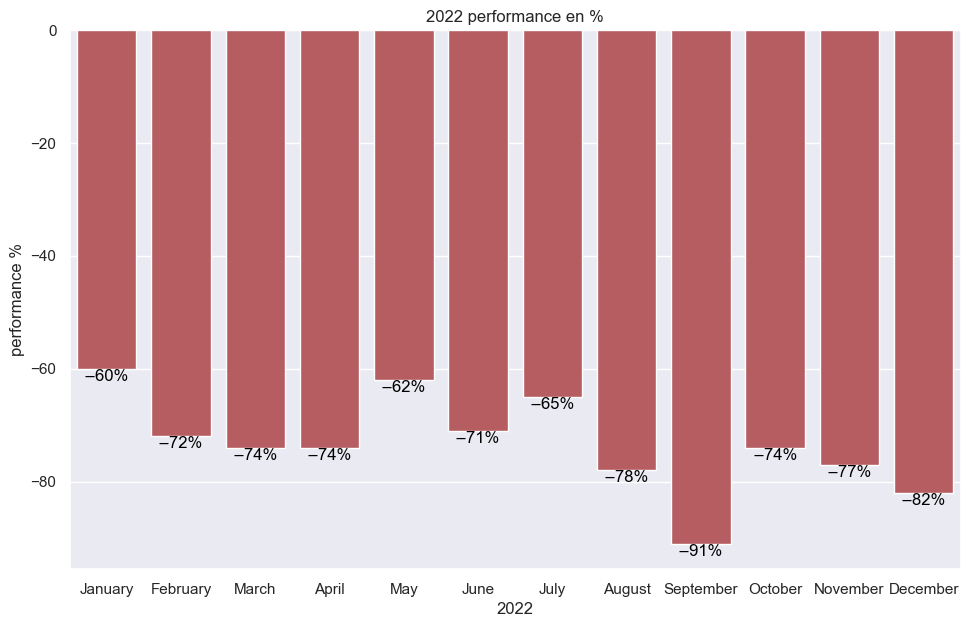

----- 2023 Performances cumulées: -96.05% --


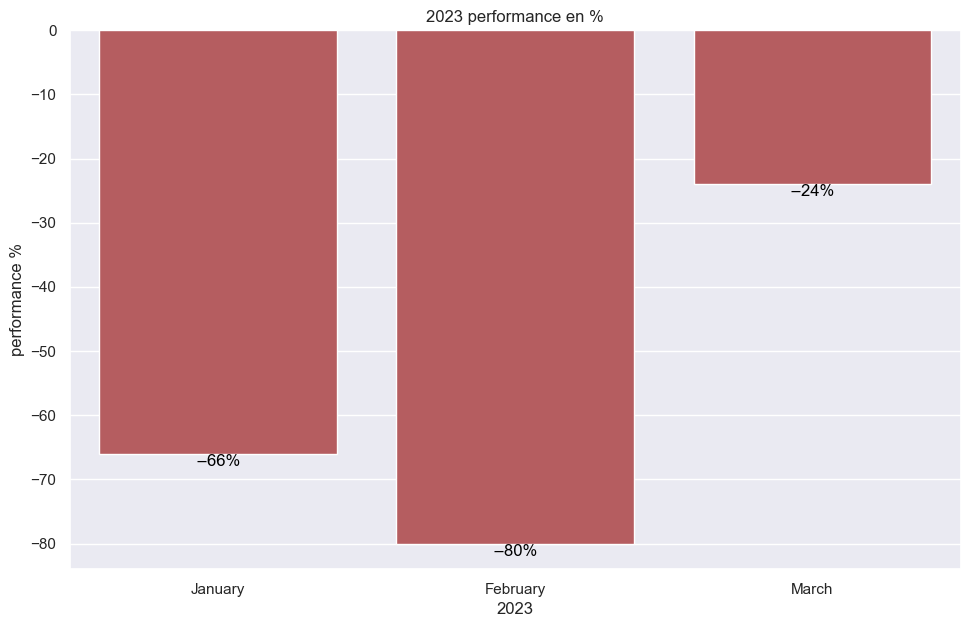

In [5]:
plot_bar_by_month(df_days=df_days)

<H2>Courbe de surapprentissage</H2>

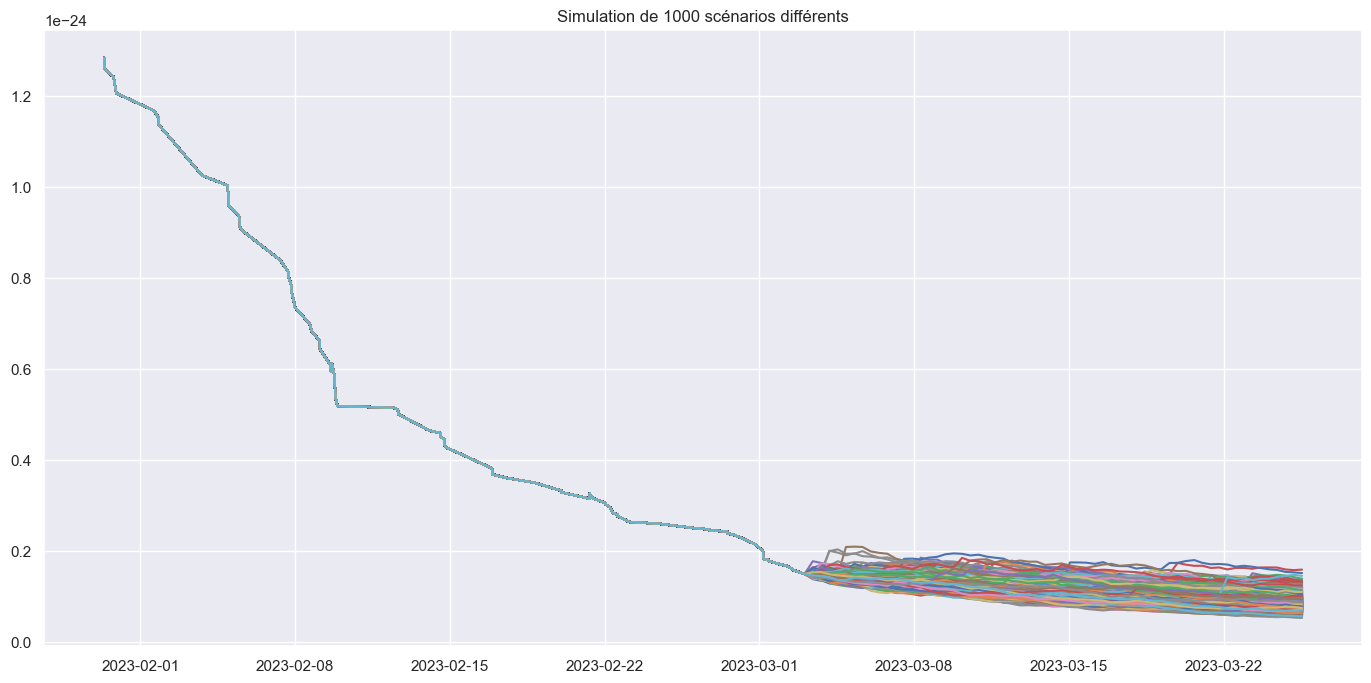

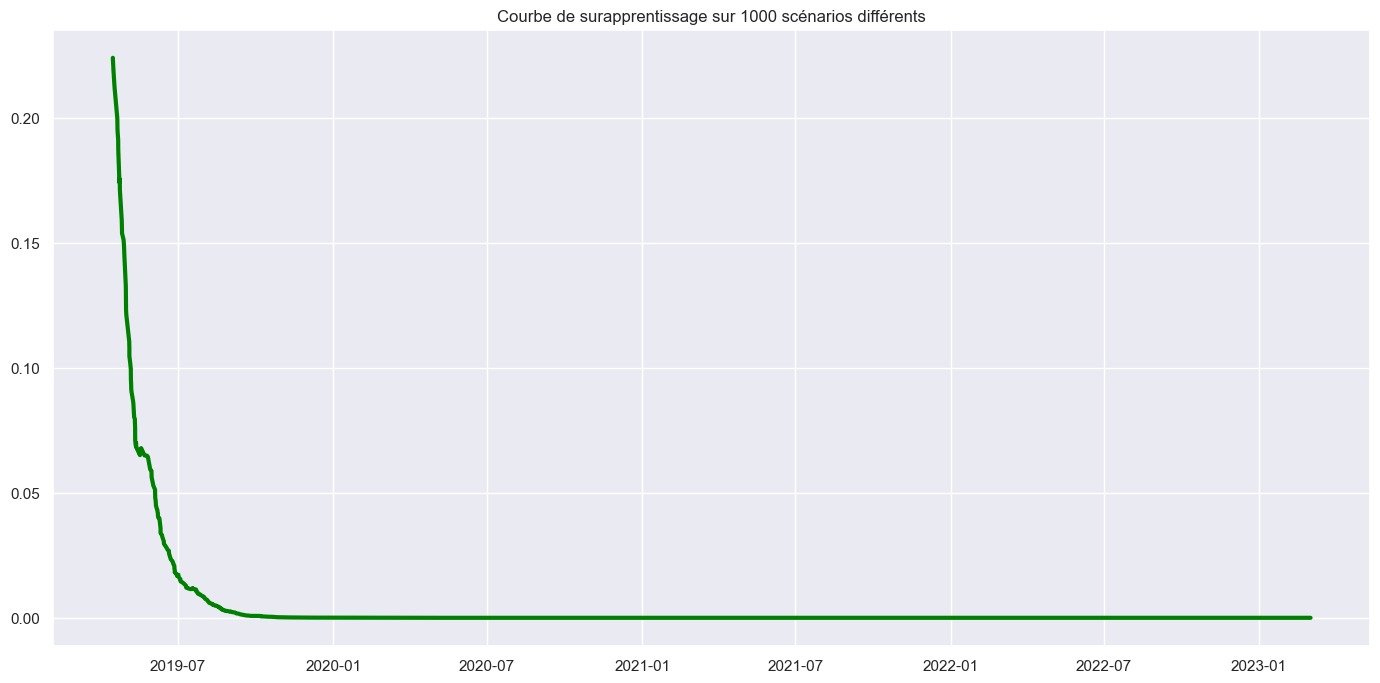

In [6]:
from utilities.futur_simulations import plot_futur_simulations, plot_train_test_simulation

# Simulation de divers scénarios futurs
plot_futur_simulations(
    df_trades=df_trades,
    trades_multiplier=3,
    trades_to_forecast=60,
    number_of_simulations=1000,
    true_trades_to_show=100,
    show_all_simulations=True
)

# Comparaison entre les divers scénarios et la réalité pour voir si il y a du surapprentissage
# Séparation des échantillons en train et en test - Méthode de Monte Carlo (Loi normale)
plot_train_test_simulation(
    df_trades=df_trades,
    train_test_date="2022-01-01",
    trades_multiplier=3,
    number_of_simulations=1000,
)